In [1]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Print the column names to verify the presence of 'Cabin'
print("Columns in the dataset:")
print(train_df.columns)


Columns in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [7]:
missing_data = train_df.isnull().sum()

missing_data[missing_data > 0]

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# train_df.drop(columns=['Cabin'], inplace=True)

# train_df.dropna(subset=['Boat'], inplace=True)  # Example if 'Boat' column exists

train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


<ipython-input-9-c0f4ced8d599>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='viridis')


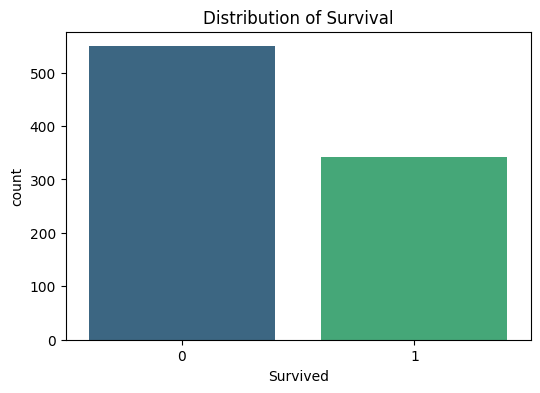

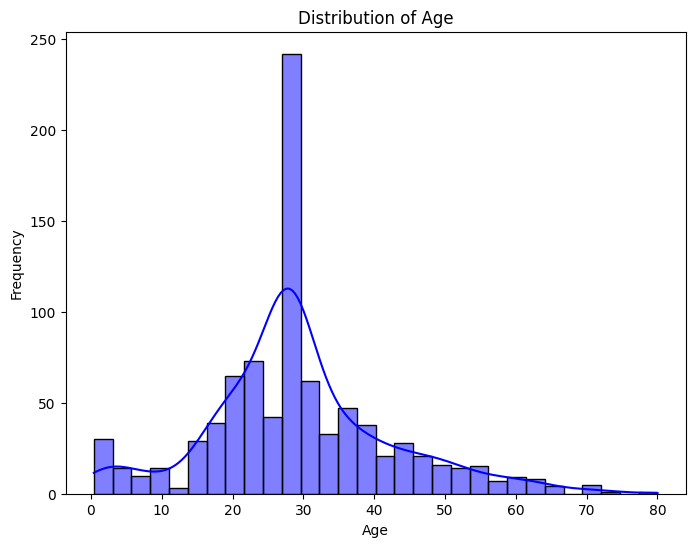

<ipython-input-9-c0f4ced8d599>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_df, palette='viridis')


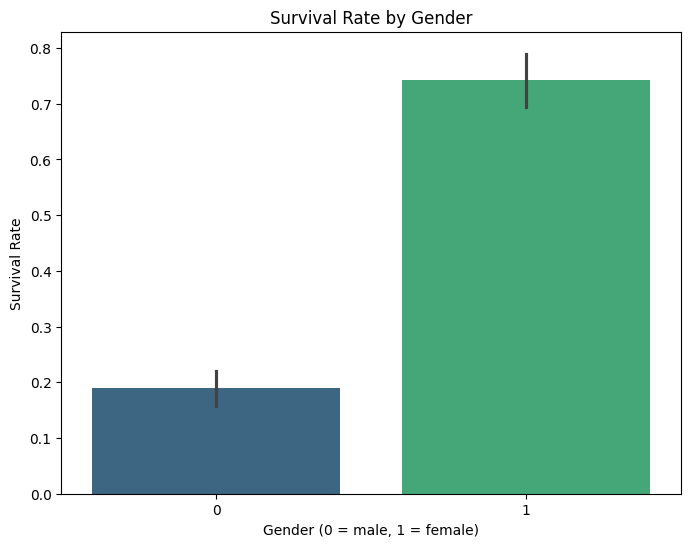

<ipython-input-9-c0f4ced8d599>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=train_df, palette='viridis')


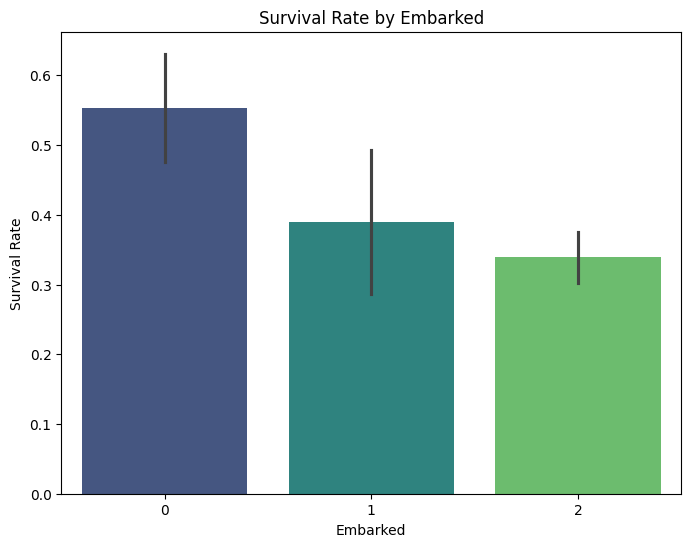

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df.describe(include='all')

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df, palette='viridis')
plt.title('Distribution of Survival')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_df, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = male, 1 = female)')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=train_df, palette='viridis')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()


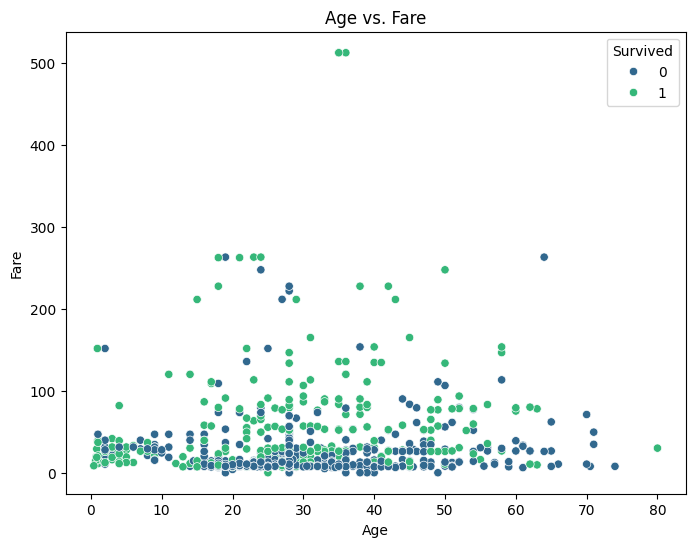

<ipython-input-10-8f26d7c7005e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_df, palette='viridis')


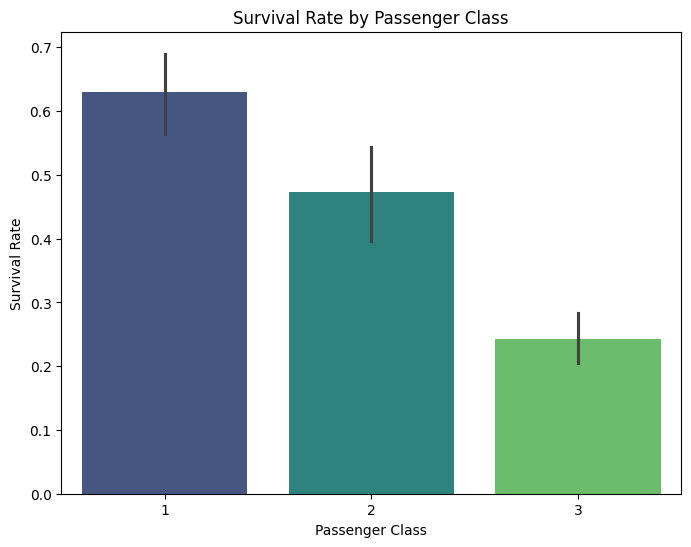

<ipython-input-10-8f26d7c7005e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=train_df, palette='viridis')


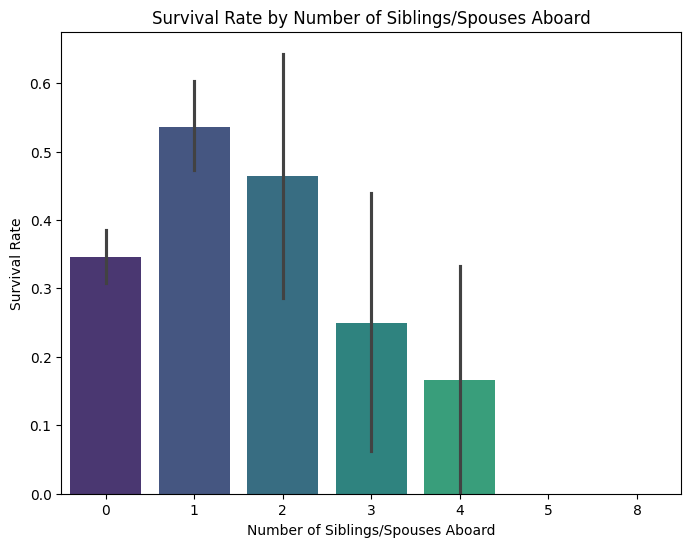

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df, palette='viridis')
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=train_df, palette='viridis')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()